In [10]:
# 0. Importar librerías
import pandas as pd
import numpy as np
import re
from unicodedata import normalize
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Configuraciones de visualización
sns.set()  # estilo Seaborn (opcional)
plt.rcParams["figure.figsize"] = (8, 5)


In [11]:
# 1. Cargar los datasets manualmente desde Parquet
df_train = pd.read_parquet("/home/carizac/documnetos/proyecto_nlp/train-00000-of-00001-40d9940488cb84b1.parquet")
df_test = pd.read_parquet("/home/carizac/documnetos/proyecto_nlp/test-00000-of-00001-9cc7bacfd2a73ac7.parquet")

# 2. Verificar estructura
print("Entrenamiento:", df_train.shape)
print("Prueba:", df_test.shape)
df_train.head()
df_test.head()


Entrenamiento: (176192, 2)
Prueba: (75510, 2)


,text,label
0,"parece familiar?. probablemente no, ya que se ...",3
1,"el hotel, espectacular. el hotel es muy bonito...",5
2,lugar bueno escondido. amabilidad profesionali...,4
3,situacion privilegiada. hotel con una situacio...,5
4,caminata y visita al cerro monserrate. buen lu...,5


In [12]:
# Información general del DataFrame
print("=== df_train.info() ===")
df_train.info()

# Verificar valores nulos
print("\n=== Valores nulos ===")
print(df_train.isnull().sum())


=== df_train.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176192 entries, 0 to 176191
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    176192 non-null  object
 1   label   176192 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB

=== Valores nulos ===
text     0
label    0
dtype: int64



=== Distribución de etiquetas ===
label
5    109816
4     42232
3     15261
2      4833
1      4050
Name: count, dtype: int64


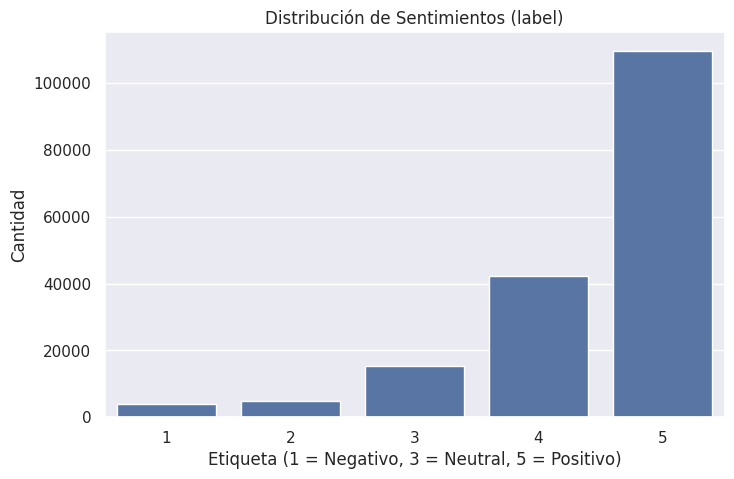

In [13]:
# Distribución de la columna 'label'
print("\n=== Distribución de etiquetas ===")
print(df_train['label'].value_counts())

# Visualización rápida con Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x='label')
plt.title("Distribución de Sentimientos (label)")
plt.xlabel("Etiqueta (1 = Negativo, 3 = Neutral, 5 = Positivo)")
plt.ylabel("Cantidad")
plt.show()


count    176192.000000
mean        388.266334
std         424.612858
min          17.000000
25%         199.000000
50%         276.000000
75%         430.000000
max       20494.000000
Name: long_texto, dtype: float64


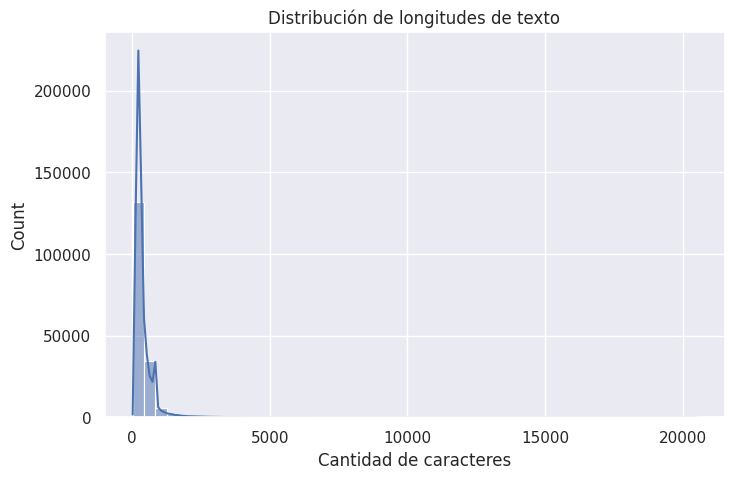

In [14]:
# Longitud de cada texto
df_train["long_texto"] = df_train["text"].apply(len)

# Estadísticas descriptivas
print(df_train["long_texto"].describe())

# Histograma
sns.histplot(df_train["long_texto"], bins=50, kde=True)
plt.title("Distribución de longitudes de texto")
plt.xlabel("Cantidad de caracteres")
plt.show()


In [15]:
def limpiar_texto(text):
    # Convertir a minúsculas
    text = text.lower()

    # Normalizar: eliminar tildes y caracteres raros
    text = normalize("NFD", text).encode("ascii", "ignore").decode("utf-8")

    # Eliminar caracteres especiales
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    return text

In [17]:
df_train[["text", "texto_limpio"]].head(10)


,text,texto_limpio
0,el mejor lugar para comer sushi. excelente lug...,el mejor lugar para comer sushi excelente luga...
1,vista hermosa!. me sorprendió la maravillosa v...,vista hermosa me sorprendio la maravillosa vis...
2,"desastroso. buenas noches, ante todo explicar...",desastroso buenas noches ante todo explicar q...
3,todo bien excepto que se niegan a dar vasos de...,todo bien excepto que se niegan a dar vasos de...
4,el mejor zoologico de méxico. el ambiente es m...,el mejor zoologico de mexico el ambiente es mu...
5,"muy buen hotel. muy bien hotel, con precio acc...",muy buen hotel muy bien hotel con precio acces...
6,lugar increíble. no vayas con un tour organiza...,lugar increible no vayas con un tour organizad...
7,hermoso paseo a pie o en calesa. hermoso paseo...,hermoso paseo a pie o en calesa hermoso paseo ...
8,excelente comida y buen servicio. el lugar es ...,excelente comida y buen servicio el lugar es e...
9,ideal para toda ocasión :). me encanto la comi...,ideal para toda ocasion me encanto la comida ...
